# QC: preprocess, filtering, normalization, log tansform

### Documention

In [1]:
# https://nbisweden.github.io/excelerate-scRNAseq/session-qc/Quality_control.html
#https://www.sc-best-practices.org/preprocessing_visualization/normalization.html

### genutzt Github scanpy ----pearson residuals, scrublet (douplet)

## Load packages

In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Load the h5ad Data Object containing the counts and annotations

In [3]:
# Read andata object
adata = sc.read_h5ad('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/PANC1_3D.h5ad') # change path in your case

In [4]:
print(adata.obs['condition'])

barcode
AAACCCAGTAGGCTCC-1         CTRL_1
AAACCCAGTCGCAACC-1         CTRL_1
AAACCCATCCACAAGT-1         CTRL_1
AAACGCTTCACTACGA-1         CTRL_1
AAACGCTTCAGCCTCT-1         CTRL_1
                         ...     
TTTACTGTCATTACTC-1    TGFb1_GEM_2
TTTCACAGTGATATAG-1    TGFb1_GEM_2
TTTCACATCGATGCAT-1    TGFb1_GEM_2
TTTCATGTCCCTCTAG-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition, Length: 11919, dtype: category
Categories (8, object): ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [5]:
adata

AnnData object with n_obs × n_vars = 11919 × 36613
    obs: 'condition'

In [6]:
adata.var

""
feature_id
ENSG00000243485
ENSG00000237613
ENSG00000186092
ENSG00000238009
ENSG00000239945
...
CMO308
CMO309
CMO310


In [7]:
# Identify CMO tags (or other spike-ins)
adata.var["CMO"] = adata.var_names.str.contains("CMO")
# Get Percentage of CMOs in cells
# Filter the Data for CMO Tags
cmo_data = adata[:, adata.var["CMO"].values].X
# Calculate the Percentage:
cmo_counts_per_cell = cmo_data.sum(axis=1)
total_counts_per_cell = adata.X.sum(axis=1)
pct_cmo_per_cell = (cmo_counts_per_cell / total_counts_per_cell) * 100
# Add to the obs DataFrame:
adata.obs["pct_cmo"] = pct_cmo_per_cell
print(adata.obs["pct_cmo"])
adata.var["CMO"]

barcode
AAACCCAGTAGGCTCC-1    24.628355
AAACCCAGTCGCAACC-1    34.891727
AAACCCATCCACAAGT-1    23.580470
AAACGCTTCACTACGA-1    23.367459
AAACGCTTCAGCCTCT-1    24.847910
                        ...    
TTTACTGTCATTACTC-1    29.620835
TTTCACAGTGATATAG-1    12.793065
TTTCACATCGATGCAT-1    50.637605
TTTCATGTCCCTCTAG-1    46.113246
TTTGACTGTTCCGGTG-1    31.137191
Name: pct_cmo, Length: 11919, dtype: float64


feature_id
ENSG00000243485    False
ENSG00000237613    False
ENSG00000186092    False
ENSG00000238009    False
ENSG00000239945    False
                   ...  
CMO308              True
CMO309              True
CMO310              True
CMO311              True
CMO312              True
Name: CMO, Length: 36613, dtype: bool

In [8]:
# Identify CMO tags (or other spike-ins)
adata.var["CMO"] = adata.var_names.str.contains("CMO")

In [9]:
# Get Percentage of CMOs in cells
# Filter the Data for CMO Tags
cmo_data = adata[:, adata.var["CMO"].values].X
# Calculate the Percentage:
cmo_counts_per_cell = cmo_data.sum(axis=1)
total_counts_per_cell = adata.X.sum(axis=1)
pct_cmo_per_cell = (cmo_counts_per_cell / total_counts_per_cell) * 100
# Add to the obs DataFrame:
adata.obs["pct_cmo"] = pct_cmo_per_cell
print(adata.obs["pct_cmo"])

barcode
AAACCCAGTAGGCTCC-1    24.628355
AAACCCAGTCGCAACC-1    34.891727
AAACCCATCCACAAGT-1    23.580470
AAACGCTTCACTACGA-1    23.367459
AAACGCTTCAGCCTCT-1    24.847910
                        ...    
TTTACTGTCATTACTC-1    29.620835
TTTCACAGTGATATAG-1    12.793065
TTTCACATCGATGCAT-1    50.637605
TTTCATGTCCCTCTAG-1    46.113246
TTTGACTGTTCCGGTG-1    31.137191
Name: pct_cmo, Length: 11919, dtype: float64


In [10]:
adata.var["CMO"]

feature_id
ENSG00000243485    False
ENSG00000237613    False
ENSG00000186092    False
ENSG00000238009    False
ENSG00000239945    False
                   ...  
CMO308              True
CMO309              True
CMO310              True
CMO311              True
CMO312              True
Name: CMO, Length: 36613, dtype: bool

In [11]:
# Count the entries in the 'CMO' column
cmo_counts = adata.var["CMO"].value_counts()

# Output the number of different entries in 'CMO'
print("Number of different entries in 'CMO':")
print(cmo_counts)

Number of different entries in 'CMO':
CMO
False    36601
True        12
Name: count, dtype: int64


In [12]:
adata = adata[:, ~adata.var["CMO"].values]

In [13]:
adata.var["CMO"]

feature_id
ENSG00000243485    False
ENSG00000237613    False
ENSG00000186092    False
ENSG00000238009    False
ENSG00000239945    False
                   ...  
ENSG00000277836    False
ENSG00000278633    False
ENSG00000276017    False
ENSG00000278817    False
ENSG00000277196    False
Name: CMO, Length: 36601, dtype: bool

In [14]:
# Zählen der Einträge in der Spalte 'CMO'
cmo_counts = adata.var["CMO"].value_counts()

# Ausgabe der Anzahl der verschiedenen Einträge in 'CMO'
print("Anzahl der verschiedenen Einträge in 'CMO':")
print(cmo_counts)

Anzahl der verschiedenen Einträge in 'CMO':
CMO
False    36601
Name: count, dtype: int64


In [15]:
adata

View of AnnData object with n_obs × n_vars = 11919 × 36601
    obs: 'condition', 'pct_cmo'
    var: 'CMO'

In [16]:
#### 36613 n_vars to 36601 n_vars --> CMO deleted

In [17]:
adata.var

,CMO
feature_id,
ENSG00000243485,False
ENSG00000237613,False
ENSG00000186092,False
ENSG00000238009,False
ENSG00000239945,False
...,...
ENSG00000277836,False
ENSG00000278633,False
ENSG00000276017,False


## END of filtering CMO

# Merge same samples together, based on cell number

In [18]:
# Merge CTRL_1 and CTRL_2 into a single condition label
adata.obs['condition'].replace({'CTRL_1': 'CTRL_merged', 'CTRL_2': 'CTRL_merged'}, inplace=True)

# Specify the groups you want to compare
categories_list = list(adata.obs['condition'].cat.categories)
print(categories_list)

['CTRL_merged', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [19]:
# Merge CTRL_1 and CTRL_2 into a single condition label
adata.obs['condition'].replace({'TGFb1_1': 'TGFb1_merged', 'TGFb1_2': 'TGFb1_merged'}, inplace=True)

# Specify the groups you want to compare
categories_list = list(adata.obs['condition'].cat.categories)
print(categories_list)

['CTRL_merged', 'CTRL_2D', 'GEM_2', 'TGFb1_merged', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [20]:
# Merge CTRL_1 and CTRL_2 into a single condition label
adata.obs['condition'].replace({'TGFb1_GEM_1': 'TGFb1_GEM_merged', 'TGFb1_GEM_2': 'TGFb1_GEM_merged'}, inplace=True)

# Specify the groups you want to compare
categories_list = list(adata.obs['condition'].cat.categories)
print(categories_list)

['CTRL_merged', 'CTRL_2D', 'GEM_2', 'TGFb1_merged', 'TGFb1_GEM_merged']


In [21]:
# Optional: Print the current working directory for confirmation
print("Current working directory:", os.getcwd())

Current working directory: /home/sac43cg/Scripte/END_scripts/03_QC, Filtering, Normalization


In [22]:
# Define the directory where the figure will be saved
figures_dir = 'figures'

# Create 'figures' directory if it doesn't exist
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

Observation annotations:
                   condition    pct_cmo
barcode                                
AAACCCAGTAGGCTCC-1    CTRL_1  24.628355
AAACCCAGTCGCAACC-1    CTRL_1  34.891727
AAACCCATCCACAAGT-1    CTRL_1  23.580470
AAACGCTTCACTACGA-1    CTRL_1  23.367459
AAACGCTTCAGCCTCT-1    CTRL_1  24.847910

Variable annotations:
                   CMO
feature_id            
ENSG00000243485  False
ENSG00000237613  False
ENSG00000186092  False
ENSG00000238009  False
ENSG00000239945  False
Condition: CTRL_merged

Number of features: 36601

Number of barcodes: 3423


Observation annotations:
                   condition    pct_cmo
barcode                                
AAACCCAAGAGGTATT-1   CTRL_2D  36.912426
AAACCCAAGGATCACG-1   CTRL_2D  43.398678
AAACCCAAGGGCCCTT-1   CTRL_2D  18.707311
AAACCCAGTGCCCAGT-1   CTRL_2D  25.117870
AAACGAAAGATTCGCT-1   CTRL_2D   8.641642

Variable annotations:
                   CMO
feature_id            
ENSG00000243485  False
ENSG00000237613  False
ENSG000001860

/tmp/ipykernel_3333085/4017229126.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conditions, y=num_features_list, ax=ax[0], palette='viridis')
/tmp/ipykernel_3333085/4017229126.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3333085/4017229126.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conditions, y=num_barcodes_list, ax=ax[1], palette='viridis')
/tmp/ipykernel_3333085/4017229126.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')


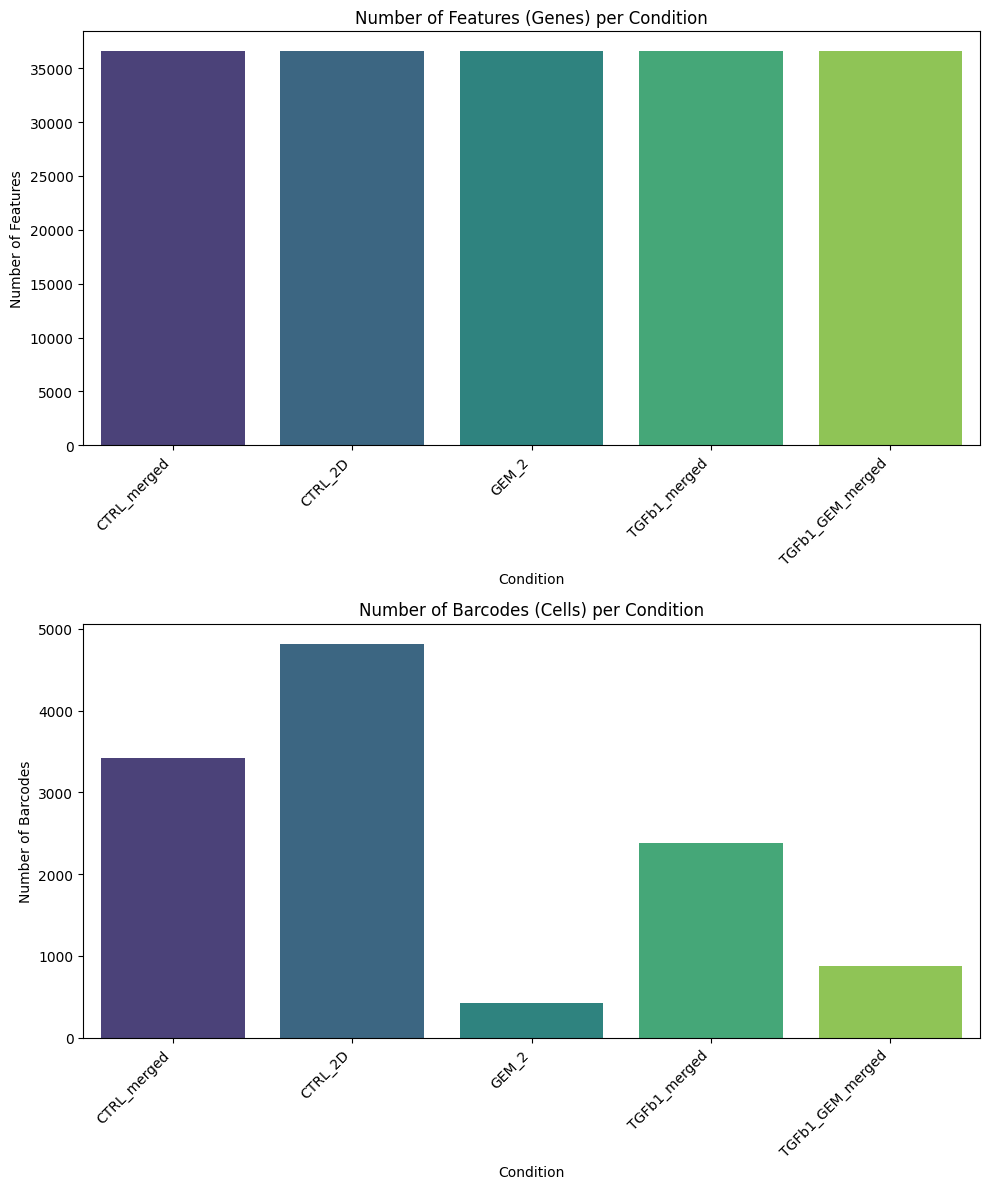

In [24]:
# Prepare lists to store condition data
conditions = []
num_features_list = []
num_barcodes_list = []

# Iterate over each condition
for condition in adata.obs['condition'].unique():
    condition_adata = adata[adata.obs['condition'] == condition]
    
    # Get the number of features and barcodes for the current condition
    num_features = condition_adata.n_vars
    num_barcodes = condition_adata.n_obs
    
    # Append data to lists
    conditions.append(condition)
    num_features_list.append(num_features)
    num_barcodes_list.append(num_barcodes)

    # Print observation and variable annotations
    print("Observation annotations:")
    print(condition_adata.obs.head())  # Print the first few rows of observation annotations
    
    print("\nVariable annotations:")
    print(condition_adata.var.head())  # Print the first few rows of variable annotations
    
    # Write the condition name, number of features, and number of barcodes to the file
    print(f"Condition: {condition}\n")
    print(f"Number of features: {num_features}\n")
    print(f"Number of barcodes: {num_barcodes}\n\n")

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Bar plot for the number of features
sns.barplot(x=conditions, y=num_features_list, ax=ax[0], palette='viridis')
ax[0].set_title('Number of Features (Genes) per Condition')
ax[0].set_xlabel('Condition')
ax[0].set_ylabel('Number of Features')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Bar plot for the number of barcodes
sns.barplot(x=conditions, y=num_barcodes_list, ax=ax[1], palette='viridis')
ax[1].set_title('Number of Barcodes (Cells) per Condition')
ax[1].set_xlabel('Condition')
ax[1].set_ylabel('Number of Barcodes')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

# Save the figure as a PNG file in the 'figures' directory
plt.savefig(os.path.join(figures_dir, 'features_and_barcodes_per_condition.png'))


plt.show()


In [25]:
adata

View of AnnData object with n_obs × n_vars = 11919 × 36601
    obs: 'condition', 'pct_cmo'
    var: 'CMO'

In [27]:
adata.write('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/filtering_1_Step.h5ad')

### END

# Basic filtering

In [29]:
sc.read_h5ad('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/filtering_1_Step.h5ad')

AnnData object with n_obs × n_vars = 11919 × 36601
    obs: 'condition', 'pct_cmo'
    var: 'CMO'

In [30]:
# Gegebenes AnnData Objekt
for adata in [adata]:
    # Variablennamen (Gene) eindeutig machen
    adata.var_names_make_unique()
    
    # Form des Datensatzes ausgeben
    print("Data shape:", adata.shape)
    
    # Zeigt die ersten Zeilen von adata.obs (Informationen zu den Zellen)
    print("adata.obs (cell metadata):")
    print(adata.obs.head())
    
    # Zeigt die ersten Zeilen von adata.var (Informationen zu den Variablen/Genen)
    print("adata.var (gene metadata):")
    print(adata.var.head())
    
    # Zellen filtern: mindestens 200 Gene pro Zelle
    sc.pp.filter_cells(adata, min_genes=200)

    # Gene filtern: müssen in mindestens 3 Zellen vorkommen
    sc.pp.filter_genes(adata, min_cells=3)


Data shape: (11919, 36601)
adata.obs (cell metadata):
                      condition    pct_cmo
barcode                                   
AAACCCAGTAGGCTCC-1  CTRL_merged  24.628355
AAACCCAGTCGCAACC-1  CTRL_merged  34.891727
AAACCCATCCACAAGT-1  CTRL_merged  23.580470
AAACGCTTCACTACGA-1  CTRL_merged  23.367459
AAACGCTTCAGCCTCT-1  CTRL_merged  24.847910
adata.var (gene metadata):
                   CMO
feature_id            
ENSG00000243485  False
ENSG00000237613  False
ENSG00000186092  False
ENSG00000238009  False
ENSG00000239945  False


# Compute quality control metrics

In [31]:
import pandas as pd
from biomart import BiomartServer

# Connect to the BioMart server
server = BiomartServer("http://ensembl.org/biomart")

# Select the human genes dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Query BioMart to get the translation from Ensembl ID to gene symbol
response = dataset.search({
    'attributes': ['ensembl_gene_id', 'external_gene_name'],
})

# Initialize an empty list to store the rows
rows = []

# Iterate through the response lines
for line in response.iter_lines():
    # Decode the line
    decoded_line = line.decode('utf-8').strip()
    if not decoded_line:
        continue

    # Split the line into Ensembl ID and gene name
    try:
        ensembl_id, gene_name = decoded_line.split('\t')
    except ValueError:
        continue
    
    # Append the row to the list
    rows.append([ensembl_id, gene_name])

# Convert the list to a DataFrame
df = pd.DataFrame(rows, columns=['ensembl_gene_id', 'gene_name'])

# Create the mapping dictionary
ensembl_to_gene_name = dict(zip(df['ensembl_gene_id'], df['gene_name']))

# Extracting the Ensembl IDs from the var_names
ensembl_ids = adata.var_names.tolist()

# Mapping the Ensembl IDs to gene symbols using the provided dictionary
# If no gene name is found, keep the Ensembl ID
gene_symbols = [ensembl_to_gene_name.get(ensembl_id, ensembl_id) for ensembl_id in ensembl_ids]

# Adding the gene symbols to adata.var
adata.var["gene_symbol"] = gene_symbols

# Die var_names auf die Gene-Symbole setzen, wenn gewünscht
# Falls du möchtest, dass die var_names auf die Gene-Symbole gesetzt werden:
# adata.var_names = adata.var['gene_symbol']


In [32]:
adata

AnnData object with n_obs × n_vars = 11691 × 26820
    obs: 'condition', 'pct_cmo', 'n_genes'
    var: 'CMO', 'n_cells', 'gene_symbol'

In [33]:
# Markiere mitochondriale Gene, die mit "MT-" beginnen
adata.var["mt"] = adata.var['gene_symbol'].str.startswith("MT-")

# Berechne Qualitätskontrollmetriken basierend auf mitochondrialen Genen
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, inplace=True
)


In [34]:
adata

AnnData object with n_obs × n_vars = 11691 × 26820
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


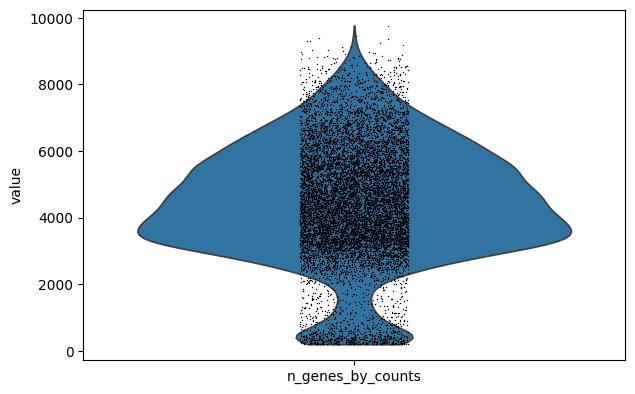

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


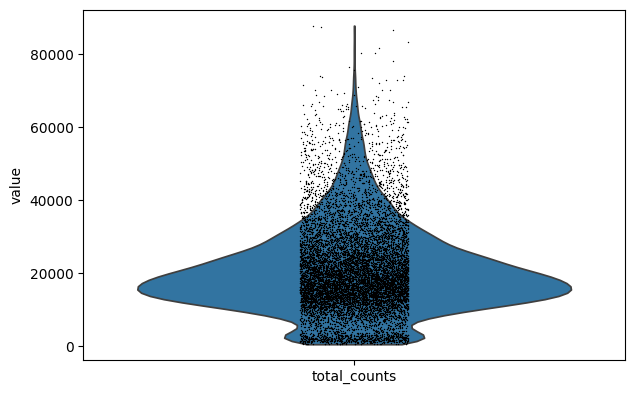

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


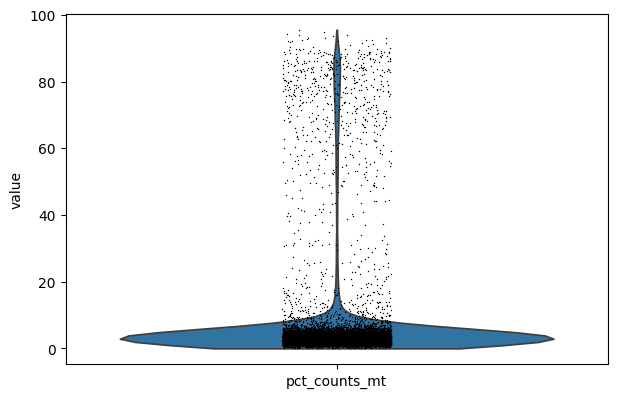

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


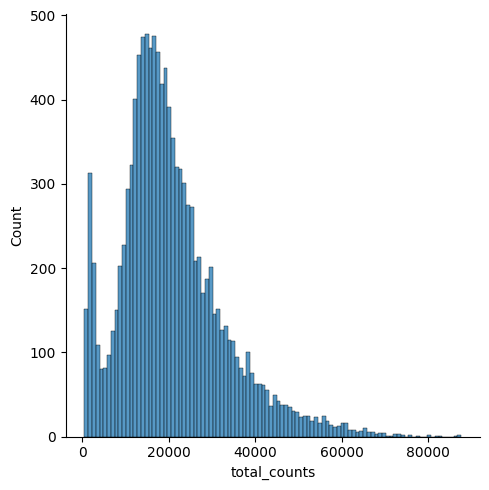

In [35]:
# Erstelle ein Violin-Plot für Qualitätsmetriken ohne den `jitter`-Parameter
sc.pl.violin(adata, "n_genes_by_counts", density_norm='width')
sc.pl.violin(adata, "total_counts", density_norm='width')
sc.pl.violin(adata, "pct_counts_mt", density_norm='width')
sns.displot(adata.obs["total_counts"], bins=100, kde=False)



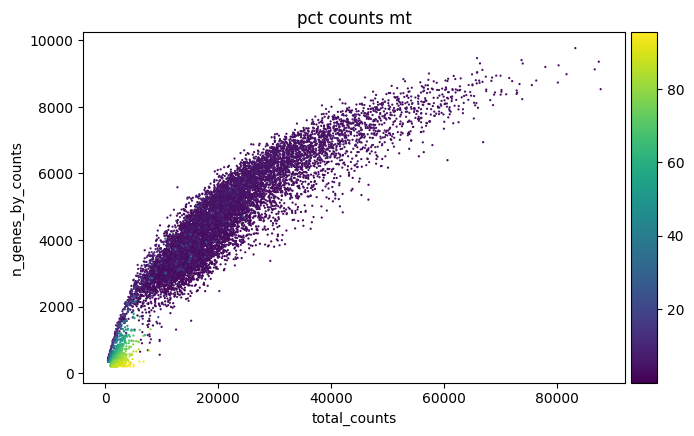

In [36]:
 sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


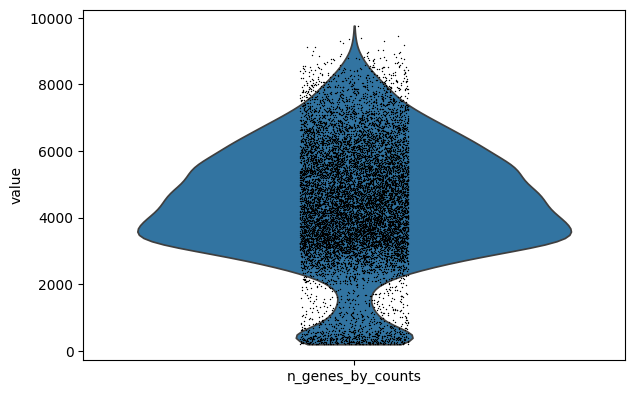

In [37]:
sc.pl.violin(adata, "n_genes_by_counts", density_norm='width')

In [38]:
# define outliers and do the filtering for the 3k dataset
adata.obs["outlier_mt"] = adata.obs.pct_counts_mt > 8
adata.obs["outlier_total"] = adata.obs.total_counts > 70000
adata.obs["outlier_ngenes"] = adata.obs.n_genes_by_counts > 8500

print(
    "%u cells with high %% of mitochondrial genes"
    % (sum(adata.obs["outlier_mt"]))
)
print("%u cells with large total counts" % (sum(adata.obs["outlier_total"])))
print("%u cells with large number of genes" % (sum(adata.obs["outlier_ngenes"])))

adata = adata[~adata.obs["outlier_mt"], :]
adata = adata[~adata.obs["outlier_total"], :]
adata= adata[~adata.obs["outlier_ngenes"], :]
sc.pp.filter_genes(adata, min_cells=1)

1004 cells with high % of mitochondrial genes
22 cells with large total counts
72 cells with large number of genes


/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [39]:
adata

AnnData object with n_obs × n_vars = 10609 × 26820
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

### END

# Filter our ribo genes before HVG

In [40]:
# Markiere mitochondriale Gene, die mit "MT-" beginnen
adata.var["ribo"] = adata.var['gene_symbol'].str.startswith('RPS', 'RPL')
#var_df['ribo'] = var_df['gene_symbol'].str.startswith(('RPS', 'RPL'))  # Ribosomale Gene

In [41]:
# Optional: Print the current working directory for confirmation
print("Current working directory:", os.getcwd())

Current working directory: /home/sac43cg/Scripte/END_scripts/03_QC, Filtering, Normalization


In [42]:
import pandas as pd

# Definiere den Speicherort und Dateinamen
ribo_speicherort = '/home/sac43cg/Scripte/END_scripts/03_QC, Filtering, Normalization/filtered_genes.csv'

# Erstellen einer Maske für die Gene, deren Symbole mit 'RPS' oder 'RPL' beginnen
mask = adata.var['gene_symbol'].str.startswith(('RPS', 'RPL'))

# Filtern der Gene
filtered_genes_df = adata.var[mask].copy()

# Speichern der gefilterten Gene in eine CSV-Datei
filtered_genes_df.to_csv(ribo_speicherort)

# Erstellen eines neuen AnnData-Objekts ohne die Ribo-Gene
adata = adata[:, ~mask]

In [43]:
adata


View of AnnData object with n_obs × n_vars = 10609 × 26716
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo'

# Douplet filter

In [44]:
import scanpy as sc
import scrublet as scr
import numpy as np

sc.pp.filter_genes(adata, min_cells=3)

# Entferne doppelte Zellen mit Scrublet
scrub = scr.Scrublet(adata.X)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

# Füge die Scrublet-Ergebnisse zum AnnData-Objekt hinzu
adata.obs['doublet_scores'] = doublet_scores
adata.obs['predicted_doublets'] = predicted_doublets

# Entferne vorhergesagte doppelte Zellen
adata = adata[~adata.obs['predicted_doublets']]


/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 2.6%
Estimated detectable doublet fraction = 42.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.0%
Elapsed time: 13.8 seconds


In [46]:
adata

View of AnnData object with n_obs × n_vars = 10335 × 26511
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes', 'doublet_scores', 'predicted_doublets'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo'

In [47]:
adata.write('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/PANC1_2_step.h5ad')

# Pearson residuals for selection of highly variable genes

In [2]:
adata = sc.read_h5ad('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/PANC1_2_step.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 10335 × 26511
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes', 'doublet_scores', 'predicted_doublets'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo'

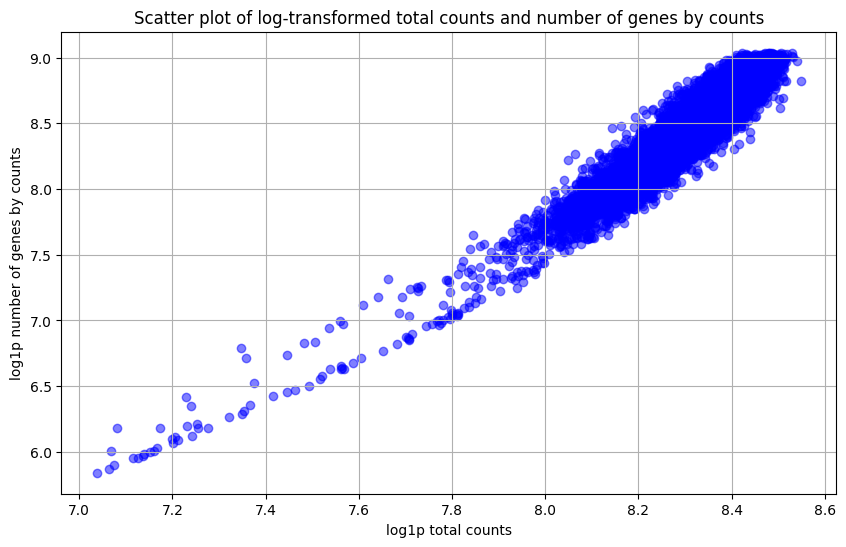

In [4]:
# Entferne Zellen mit total_counts == 0
sc.pp.filter_cells(adata, min_counts=1)

# Normalisierung und Log-Transformation erneut durchführen
sc.pp.normalize_total(adata, target_sum=1e4)
adata.uns['normalization'] = {'target_sum': 1e4}
sc.pp.log1p(adata)
adata.uns['log1p'] = {'base': None}

# QC-Metriken berechnen
sc.pp.calculate_qc_metrics(adata, inplace=True)

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(np.log1p(adata.obs['total_counts']), np.log1p(adata.obs['n_genes_by_counts']), color='blue', alpha=0.5)
plt.xlabel('log1p total counts')
plt.ylabel('log1p number of genes by counts')
plt.title('Scatter plot of log-transformed total counts and number of genes by counts')
plt.grid(True)
plt.show()

#  Transforming raw counts to Pearson residuals

Die Daten sind bereits log-transformiert.
Die Daten sind bereits normalisiert.


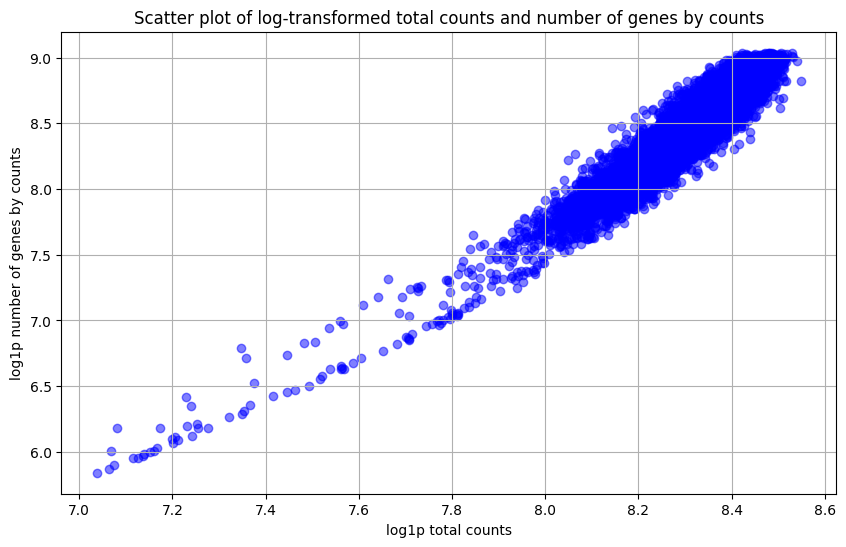

In [5]:
# Funktion zur Überprüfung, ob Daten normalisiert und log-transformiert sind
def check_normalization_and_log(adata):
    log_transformed = False
    normalized = False
    if 'log1p' in adata.uns.keys():
        if isinstance(adata.uns['log1p'], dict):
            log_transformed = True
            print("Die Daten sind bereits log-transformiert.")
        else:
            print("Ungültiges Format von adata.uns['log1p'].")
    else:
        print("Die Daten sind noch nicht log-transformiert.")
        
    if 'normalization' in adata.uns.keys():
        print("Die Daten sind bereits normalisiert.")
        normalized = True
    else:
        print("Die Daten sind noch nicht normalisiert.")

    return normalized, log_transformed

# Überprüfung der Normalisierung und Log-Transformation
normalized, log_transformed = check_normalization_and_log(adata)

# Wenn nicht normalisiert, dann normalisieren
if not normalized:
    sc.pp.normalize_total(adata, target_sum=1e4)
    adata.uns['normalization'] = {'target_sum': 1e4}  # Kennzeichnen, dass normalisiert wurde
    print("Die Daten wurden normalisiert.")

# Wenn nicht log-transformiert oder falsches Format, dann log-transformieren
if not log_transformed:
    if 'log1p' in adata.uns.keys() and isinstance(adata.uns['log1p'], dict):
        print("Die Daten sind bereits log-transformiert.")
    else:
        sc.pp.log1p(adata)
        adata.uns['log1p'] = {'base': None}  # Korrigiertes Format
        print("Die Daten wurden log-transformiert.")

# QC-Metriken berechnen
sc.pp.calculate_qc_metrics(adata, inplace=True)

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(np.log1p(adata.obs['total_counts']), np.log1p(adata.obs['n_genes_by_counts']), color='blue', alpha=0.5)
plt.xlabel('log1p total counts')
plt.ylabel('log1p number of genes by counts')
plt.title('Scatter plot of log-transformed total counts and number of genes by counts')
plt.grid(True)
plt.show()


In [6]:
adata

AnnData object with n_obs × n_vars = 10335 × 26511
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes', 'doublet_scores', 'predicted_doublets', 'n_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo'
    uns: 'normalization', 'log1p'

# Filtering end

# PCA and T-SNE

In [7]:
# Set the new working directory
new_directory = '/home/sac43cg/Scripte/END_scripts/03_QC, Filtering, Normalization/'

# Check if the directory already exists
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Change to the new directory
os.chdir(new_directory)

# Optional: Print the current working directory for confirmation
print("Current working directory:", os.getcwd())


Current working directory: /home/sac43cg/Scripte/END_scripts/03_QC, Filtering, Normalization


In [8]:
# Define the directory where the figure will be saved
figures_dir = 'ALL_cluster_withoutHGV'

# Create 'figures' directory if it doesn't exist
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

In [9]:
sc.pp.pca(adata, n_comps=50)
n_cells = len(adata)
sc.tl.tsne(adata, use_rep="X_pca")

In [10]:
#adata.var_names = adata.var['gene_symbol'] # don't used for pseudotime

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


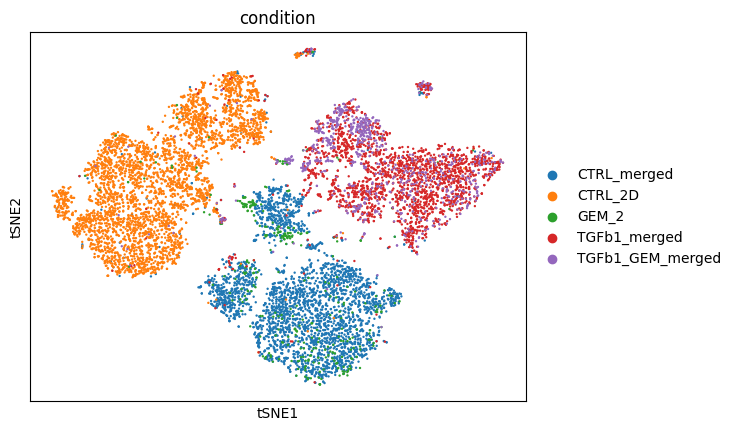

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


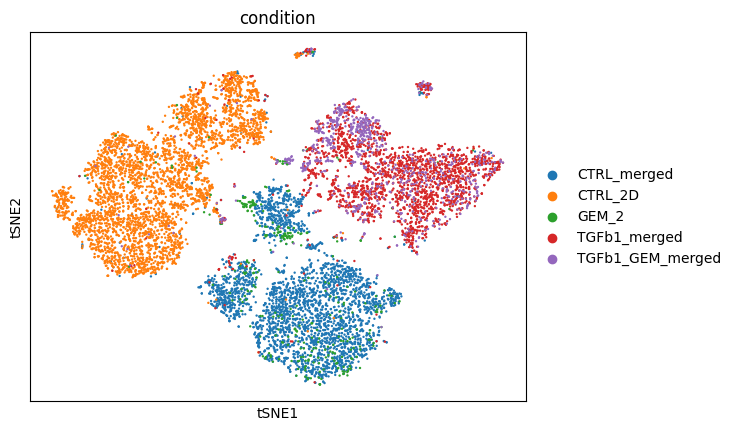

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


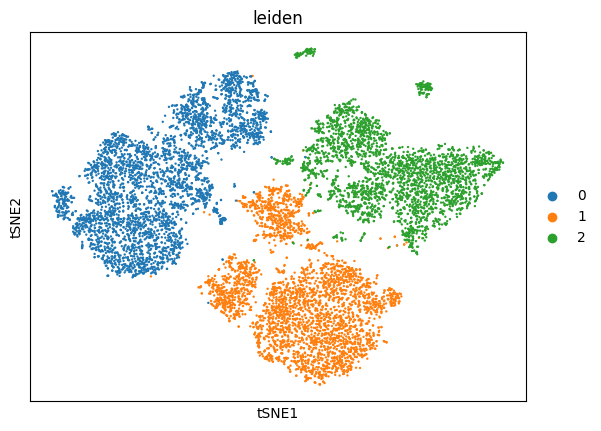

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


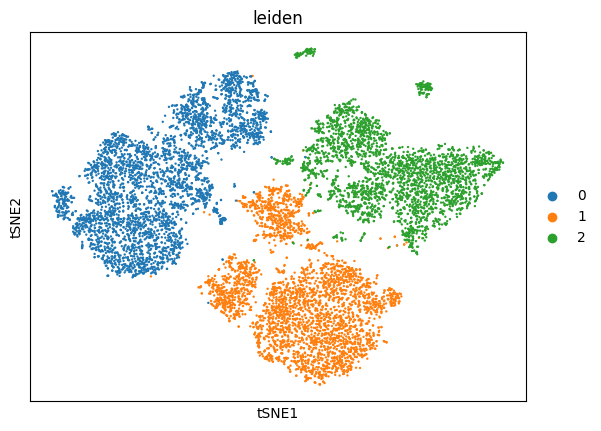

KeyError: 'Could not find key VIM in .var_names or .obs.columns.'

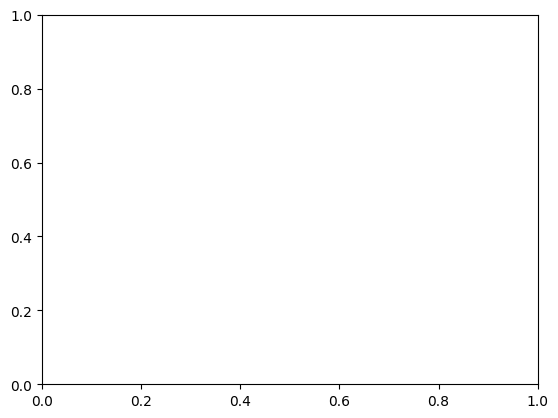

In [11]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
#sc.tl.leiden(adata, resolution=0.1, n_iterations=2, directed=False)
sc.tl.leiden(adata, resolution=0.05, n_iterations=5)  

sc.pl.tsne(adata, color='condition', title='condition', save='condition_tsne_log.pdf')
sc.pl.tsne(adata, color='condition', title='condition', save='condition_tsne_log.png')
sc.pl.tsne(adata, color='leiden', title='leiden', save='leiden_tsne_log.pdf')
sc.pl.tsne(adata, color='leiden', title='leiden', save='leiden_tsne_log.png')
sc.pl.tsne(adata, color='VIM', title='VIM', save='VIM_tsne_log.pdf')
sc.pl.tsne(adata, color='VIM', title='VIM', save='VIM_tsne_log.png')

# UMAP

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30, use_rep="X_pca")
sc.tl.leiden(adata, resolution=0.05, n_iterations=5)  
sc.tl.umap(adata)


sc.pl.umap(adata, color=["VIM"], gene_symbols="gene_symbol")
sc.pl.umap(adata, color=["leiden"], cmap="tab20")
#sc.pl.umap(adata, color=["condition"], layer="sqrt_norm")

sc.pl.umap(adata, color='condition', title='condition', save='condition_umap_log.pdf')
sc.pl.umap(adata, color='condition', title='condition', save='condition_umap_log.png')
sc.pl.umap(adata, color='leiden', title='leiden', save='leiden_umap_log.pdf')
sc.pl.umap(adata, color='leiden', title='leiden', save='leiden_umap_log.png')
sc.pl.umap(adata, color='VIM', title='VIM', save='VIM_umap_log.pdf')
sc.pl.umap(adata, color='VIM', title='VIM', save='VIM_umap_log.png')



In [ ]:
# Speichern des gefilterten AnnData-Objekts
adata.write_h5ad('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/Filtered_data.h5ad')

In [ ]:
# Read andata object
adata = sc.read_h5ad('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/APR_qualiFiltered_data.h5ad') # change path in your case

## After Quality filtering: Check of quality and normalisation with Analytic Pearson residuals

In [ ]:
## https://genomebiology.biomedcentral.com/articles/10.1186/s13059-021-02451-7
###hier net genutzt

In [12]:
adata

AnnData object with n_obs × n_vars = 10335 × 26511
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes', 'doublet_scores', 'predicted_doublets', 'n_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo'
    uns: 'normalization', 'log1p', 'pca', 'tsne', 'neighbors', 'leiden', 'condition_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


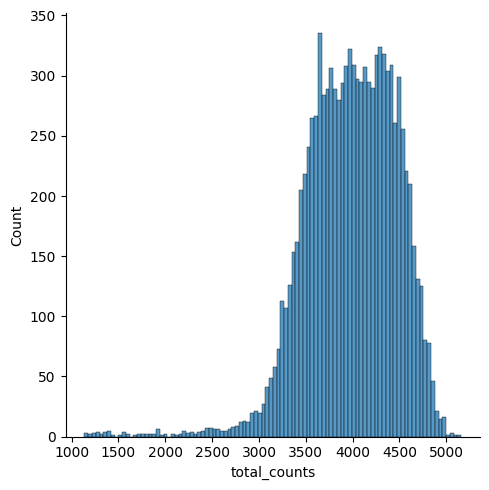

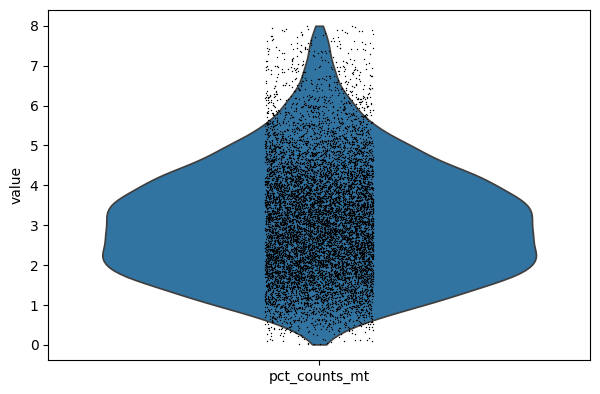

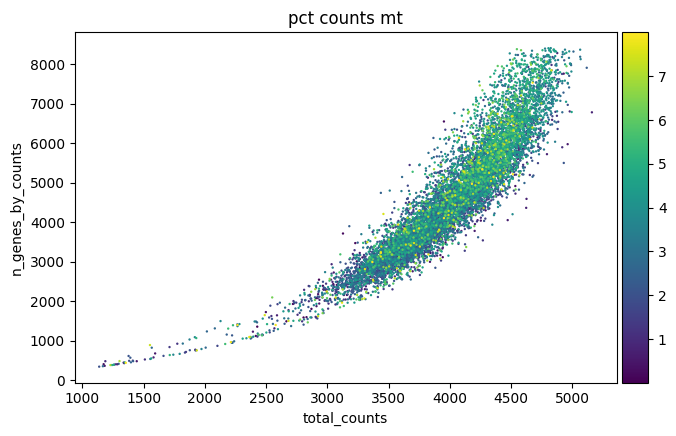

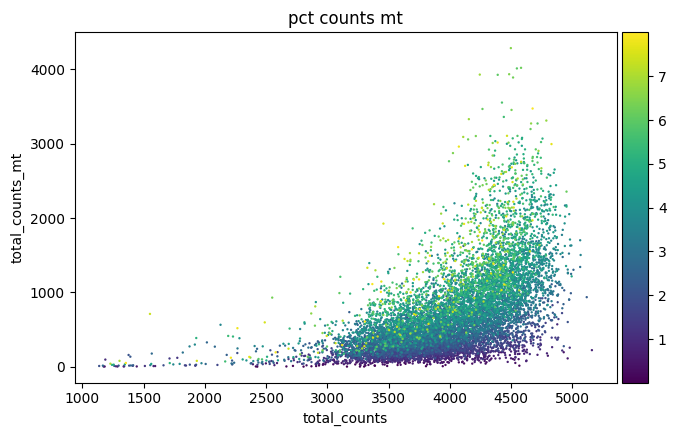

In [13]:
import seaborn as sns
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")
p5 = sc.pl.scatter(adata, "total_counts", "total_counts_mt", color="pct_counts_mt")
# Ribo genes are filtered

In [14]:
print(adata.obs.columns)


Index(['condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'outlier_mt', 'outlier_total', 'outlier_ngenes', 'doublet_scores',
       'predicted_doublets', 'n_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'leiden'],
      dtype='object')


In [15]:
adata

AnnData object with n_obs × n_vars = 10335 × 26511
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes', 'doublet_scores', 'predicted_doublets', 'n_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo'
    uns: 'normalization', 'log1p', 'pca', 'tsne', 'neighbors', 'leiden', 'condition_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## END

In [16]:
import scanpy as sc

# Assuming 'condition' is the name of the column in `adata.obs` that contains the condition labels
condition_column = 'condition'

# Check if the condition column exists in the `adata.obs`
if condition_column not in adata.obs.columns:
    raise ValueError(f"The column '{condition_column}' does not exist in `adata.obs`")

# Group by condition and count the number of cells in each condition
cell_counts = adata.obs[condition_column].value_counts()

# Print the number of cells for each condition
print("Number of cells for each condition:")
print(cell_counts)

Number of cells for each condition:
condition
CTRL_2D             3762
CTRL_merged         3215
TGFb1_merged        2180
TGFb1_GEM_merged     807
GEM_2                371
Name: count, dtype: int64


# DEG

## scanpy rank test

In [17]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')


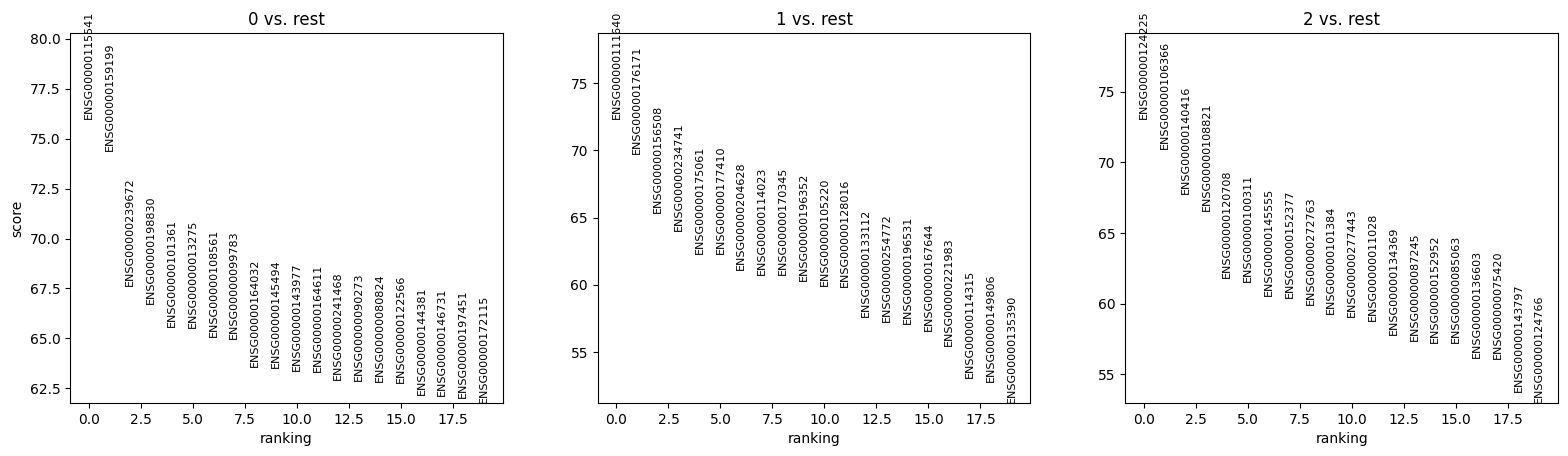

In [18]:

# Visualisierung der Top-Gene
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, title='Top 20 DEG per Cluster')

In [19]:
#sc.pp.calculate_qc_metrics(adata, inplace=True)

In [20]:
adata

AnnData object with n_obs × n_vars = 10335 × 26511
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes', 'doublet_scores', 'predicted_doublets', 'n_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo'
    uns: 'normalization', 'log1p', 'pca', 'tsne', 'neighbors', 'leiden', 'condition_colors', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Outlier check

In [21]:

# Define the function to check outliers
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * np.median(np.abs(M - np.median(M)))) | (
        np.median(M) + nmads * np.median(np.abs(M - np.median(M))) < M
    )
    return outlier


# Apply the outlier function to create a new column 'outlier' in adata.obs
adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
)

# Count the number of outliers
outlier_counts = adata.obs.outlier.value_counts()
print(outlier_counts)


outlier
False    10225
True       110
Name: count, dtype: int64


In [22]:
# Filterung basierend auf Ausreißern in outlier und mt_outlier Spalten
outlier_filter = ~(adata.obs["outlier"] )
adata_filtered = adata[outlier_filter].copy()

# Überprüfen der Anzahl der verbleibenden Zellen nach der Filterung
print(f"Number of cells after filtering of low quality cells: {adata_filtered.n_obs}")


Number of cells after filtering of low quality cells: 10225


In [23]:
adata_filtered

AnnData object with n_obs × n_vars = 10225 × 26511
    obs: 'condition', 'pct_cmo', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier_mt', 'outlier_total', 'outlier_ngenes', 'doublet_scores', 'predicted_doublets', 'n_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'outlier'
    var: 'CMO', 'n_cells', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo'
    uns: 'normalization', 'log1p', 'pca', 'tsne', 'neighbors', 'leiden', 'condition_colors', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [72]:
# Speichern des gefilterten AnnData Objekts
adata_filtered.write('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/Finish_filtern and normalized.h5ad')

In [24]:
# Save adata --> here ID ensg number_for pseudotime
adata_filtered.write('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/h5ad_files/forPseudotime.h5ad')

# END

In [25]:
adata_filtered.var

,CMO,n_cells,gene_symbol,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,ribo
feature_id,,,,,,,,,,,
ENSG00000238009,False,26,ENSG00000238009,False,26,0.001550,0.001549,99.748428,16.016567,2.834188,False
ENSG00000241860,False,435,ENSG00000241860,False,424,0.021503,0.021275,95.897436,222.234909,5.408225,False
ENSG00000286448,False,4,ENSG00000286448,False,4,0.000188,0.000188,99.961297,1.939041,1.078083,False
ENSG00000237491,False,1468,LINC01409,False,1420,0.068849,0.066582,86.260281,711.552002,6.568853,False
ENSG00000177757,False,4,FAM87B,False,4,0.000220,0.000220,99.961297,2.273282,1.185793,False
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273748,False,923,ENSG00000273748,False,888,0.046457,0.045410,91.407837,480.133636,6.176145,False
ENSG00000271254,False,1138,ENSG00000271254,False,1089,0.050549,0.049313,89.462990,522.425720,6.260395,False
ENSG00000276345,False,38,ENSG00000276345,False,36,0.001337,0.001336,99.651669,13.815956,2.695705,False
